In [1]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Epistasis calculations

How to do epistasis calcs for specific mutant cycles or all cycles at once

In [2]:
theta_file = "theta.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

In [3]:
# This generates an array holding lists of all complete mutant cycles in the
# dataframe
cycles = tfscreen.genetics.build_cycles(df["genotype"])
cycles

array([['wt', 'H29A', 'L62A', 'H29A/L62A'],
       ['wt', 'H29A', 'L62C', 'H29A/L62C'],
       ['wt', 'H29A', 'L62D', 'H29A/L62D'],
       ...,
       ['wt', 'K59Y', 'A75G', 'K59Y/A75G'],
       ['wt', 'K59Y', 'I83F', 'K59Y/I83F'],
       ['wt', 'H74A', 'K84L', 'H74A/K84L']],
      shape=(209975, 4), dtype='<U14')

In [4]:
# Get the data corresponding to cycle 100
cycle_selector = cycles[100]
print(cycle_selector)
cycle_df = df[df["genotype"].isin(cycle_selector)]
cycle_df

['wt' 'H29A' 'S69F' 'H29A/S69F']


,genotype,titrant_name,titrant_conc,theta_est,theta_std,class,name,guess,transform,scale_mu,scale_sigma,idx,lower_bounds,upper_bounds,censored,fixed
0,wt,iptg,0.0000,1.823504,0.166039,theta,theta_wt_iptg_0.0,1.000000,dummy,0.0,1.0,10,-inf,inf,False,False
1,wt,iptg,0.0001,1.752083,0.147329,theta,theta_wt_iptg_0.0001,0.999960,dummy,0.0,1.0,11,-inf,inf,False,False
2,wt,iptg,0.0010,1.649798,0.153619,theta,theta_wt_iptg_0.001,0.996037,dummy,0.0,1.0,12,-inf,inf,False,False
3,wt,iptg,0.0030,1.526672,0.145191,theta,theta_wt_iptg_0.003,0.965431,dummy,0.0,1.0,13,-inf,inf,False,False
4,wt,iptg,0.0100,1.359748,0.149432,theta,theta_wt_iptg_0.01,0.715383,dummy,0.0,1.0,14,-inf,inf,False,False
5,wt,iptg,0.0300,0.994736,0.146830,theta,theta_wt_iptg_0.03,0.218308,dummy,0.0,1.0,15,-inf,inf,False,False
6,wt,iptg,0.1000,0.611660,0.145947,theta,theta_wt_iptg_0.1,0.024519,dummy,0.0,1.0,16,-inf,inf,False,False
7,wt,iptg,1.0000,0.682915,0.142134,theta,theta_wt_iptg_1.0,0.000251,dummy,0.0,1.0,17,-inf,inf,False,False
8,H29A,iptg,0.0000,1.526031,0.199394,theta,theta_H29A_iptg_0.0,1.000000,dummy,0.0,1.0,18,-inf,inf,False,False
9,H29A,iptg,0.0001,1.373863,0.192328,theta,theta_H29A_iptg_0.0001,0.999960,dummy,0.0,1.0,19,-inf,inf,False,False


In [5]:
# Get epistasis for the mutant cycle above. The condition_selector should be a set
# of columns that uniquely define the conditions under which to calculate 
# epistasis. As written here, this calculates epistasis at every titrant_conc.
# (if we had more than one titrant, this condition_selector would have to 
# be ['titrant_name','titrant_conc'] to select unique conditions for each 
# mutant cycle). 

# scale can be "add" (default) or "mult" (multiply). 
ep_out = tfscreen.analysis.extract_epistasis(cycle_df,
                                             condition_selector=["titrant_conc"],
                                             y_obs="theta_est",
                                             y_std="theta_std",
                                             scale="add")
ep_out

,genotype,titrant_conc,00_theta_est,01_theta_est,10_theta_est,11_theta_est,00_theta_std,01_theta_std,10_theta_std,11_theta_std,ep_obs,ep_std
0,H29A/S69F,0.0000,1.823504,1.526031,1.543919,1.648189,0.166039,0.199394,0.148519,0.456661,0.401744,0.545824
1,H29A/S69F,0.0001,1.752083,1.373863,1.373452,1.116009,0.147329,0.192328,0.141395,0.374741,0.120777,0.468101
2,H29A/S69F,0.0010,1.649798,1.336662,1.184952,1.300893,0.153619,0.192390,0.142237,0.441917,0.429077,0.525485
3,H29A/S69F,0.0030,1.526672,1.219757,0.926699,2.639377,0.145191,0.186940,0.136382,0.449278,2.019592,0.525811
4,H29A/S69F,0.0100,1.359748,1.025603,0.667637,0.649400,0.149432,0.194242,0.142237,0.419066,0.315908,0.505873
5,H29A/S69F,0.0300,0.994736,0.739238,0.723110,0.763714,0.146830,0.185897,0.137475,0.411919,0.296103,0.494665
6,H29A/S69F,0.1000,0.611660,0.507188,0.661355,0.303559,0.145947,0.183742,0.134806,0.384858,-0.253324,0.470479
7,H29A/S69F,1.0000,0.682915,0.603748,0.802809,0.819181,0.142134,0.177801,0.130318,0.496624,0.095540,0.561634


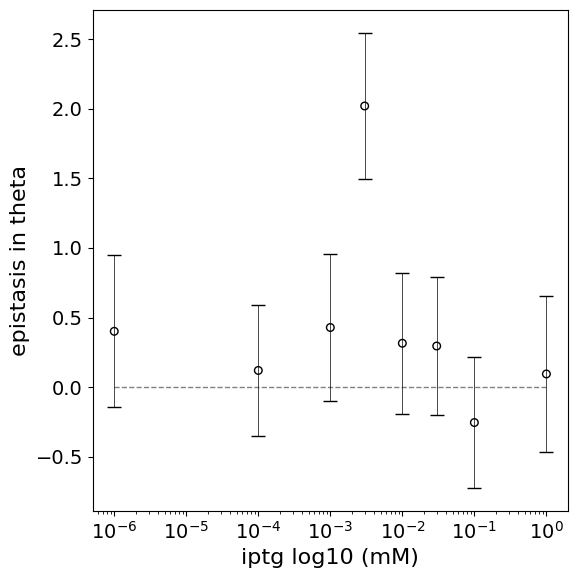

In [6]:
# Plot the results

# zero line. If "mult" above, zero_value = 1; if 'add', zero_value = 0
zero_value = 0

# Replace 0 mM iptg --> 1e-6 mM iptg
ep_out.loc[ep_out["titrant_conc"] == 0,"titrant_conc"] = 1e-6

# Create fig/ax plotting objects
fig, ax = plt.subplots(1,figsize=(6,6))

# Plot scatter and error bars
ax.scatter(ep_out["titrant_conc"],
           ep_out["ep_obs"],s=30,edgecolor='black',facecolor='none')
ax.errorbar(ep_out["titrant_conc"],
            ep_out["ep_obs"],
            ep_out["ep_std"],
            lw=0,capsize=5,elinewidth=0.5,color='black')

ax.plot([1e-6,1],[zero_value,zero_value],'--',lw=1,color='gray',zorder=-10)

# Clean up axes
ax.set_xscale('log')
ax.set_xlabel("iptg log10 (mM)")
ax.set_ylabel("epistasis in theta")
fig.tight_layout()
#fig.savefig("something.pdf") 


In [7]:
# Caculate epistasis for every possible mutant cycle at every possible
# titrant conc. Use multiplicative scale. 
all_ep_df = tfscreen.analysis.extract_epistasis(df,
                                                condition_selector=["titrant_conc"],
                                                y_obs="theta_est",
                                                y_std="theta_std",
                                                scale="mult")


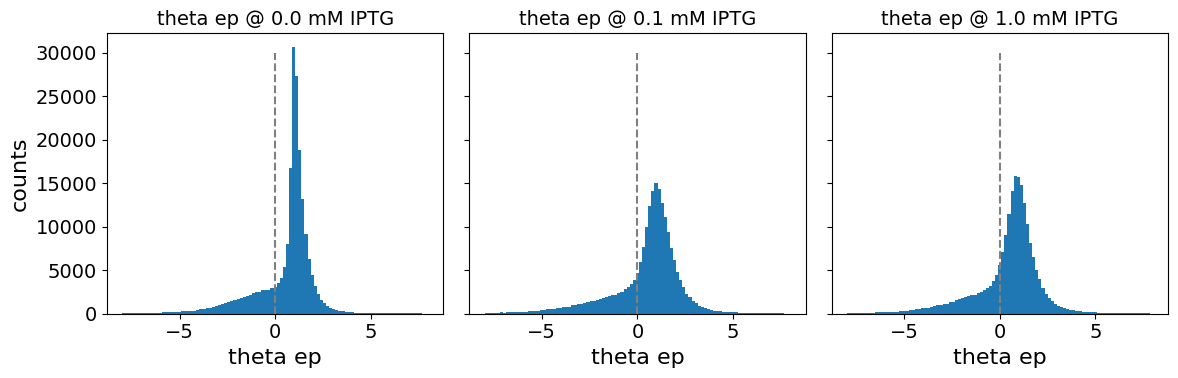

In [8]:
# Plot distribution of observed epistasis at 0, 0.1, and 1 mM IPTG

# Extract epistasis 
ep_at_0mM = all_ep_df[all_ep_df["titrant_conc"] == 0]["ep_obs"]
ep_at_0p1mM = all_ep_df[all_ep_df["titrant_conc"] == 0.1]["ep_obs"]
ep_at_1mM = all_ep_df[all_ep_df["titrant_conc"] == 1]["ep_obs"]

bins = np.linspace(-8,8,100)
fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)
counts, bin_edges, bars = ax[0].hist(ep_at_0mM,bins=bins)
ax[0].set_title("theta ep @ 0.0 mM IPTG")

counts, bin_edges, bars = ax[1].hist(ep_at_0p1mM,bins=bins)
ax[1].set_title("theta ep @ 0.1 mM IPTG")


counts, bin_edges, bars = ax[2].hist(ep_at_1mM,bins=bins)
ax[2].set_title("theta ep @ 1.0 mM IPTG")

ax[0].set_ylabel('counts')
for i in range(3):
    ax[i].set_xlabel("theta ep")
    ax[i].plot([0,0],[0,30000],'--',color='gray')
fig.tight_layout()


